<a href="https://colab.research.google.com/github/stackbacker/CredScore_ChiSquareTech/blob/main/Credit_Risk_Analysis_German_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Credit Risk Analysis
# German Credit Dataset Classification




## Introduction

**Credit Risk** is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations.

**Types of Credit Risk:**
- **Good Risk**: An investment that is likely to be profitable
- **Bad Risk**: A loan that is unlikely to be repaid due to bad credit history or insufficient income

**Objective:** Based on the attributes, classify a person as good or bad credit risk.

## Dataset Description
The dataset contains 1000 entries with 20 independent variables (7 numerical, 13 categorical) and 1 target variable.


### Dataset Description
The dataset contains 1000 entries with 20 independent variables (7 numerical, 13 categorical) and 1 target variable prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.The attributes are:                                  
#### __Independent Variables__
   * Attribute 1:  (qualitative) __Status of existing checking account__                           
      A11 :      ... <    0 DM                           
      A12 : 0 <= ... <  200 DM                                   
      A13 :      ... >= 200 DM / salary assignments for at least 1 year                           
      A14 : no checking account    
      
   * Attribute 2:  (numerical) __Duration in month__

   * Attribute 3:  (qualitative) __Credit history__               
      A30 : no credits taken/all credits paid back duly                   
      A31 : all credits at this bank paid back duly                       
      A32 : existing credits paid back duly till now                       
      A33 : delay in paying off in the past                           
      A34 : critical account/other credits existing (not at this bank)          
      
   * Attribute 4:  (qualitative)    __Purpose__              
      A40 : car (new)                         
      A41 : car (used)                              
      A42 : furniture/equipment                              
      A43 : radio/television                 
      A44 : domestic appliances                     
      A45 : repairs                        
      A46 : education                      
      A47 : vacation                    
      A48 : retraining                     
      A49 : business                         
      A410 : others
   * Attribute 5:  (numerical) __Credit amount__   
   * Attibute 6:  (qualitative) __Savings account/bonds__           
      A61 :          ... <  100 DM            
      A62 :   100 <= ... <  500 DM           
      A63 :   500 <= ... < 1000 DM            
      A64 :          .. >= 1000 DM                   
      A65 :   unknown/ no savings account         
      
   * Attribute 7:  (qualitative) __Present employment since__      
        A71 : unemployed                       
        A72 :       ... < 1 year           
        A73 : 1  <= ... < 4 years         
        A74 : 4  <= ... < 7 years            
        A75 :       .. >= 7 years         
   * Attribute 8:  (numerical) __Installment rate in percentage of disposable income__
   * Attribute 9:  (qualitative) __Personal status and sex__                      
        A91 : male   : divorced/separated               
        A92 : female : divorced/separated/married              
        A93 : male   : single               
        A94 : male   : married/widowed              
        A95 : female : single      
   * Attribute 10: (qualitative) __Other debtors / guarantors__                   
        A101 : none                  
        A102 : co-applicant                   
        A103 : guarantor             
        
   * Attribute 11: (numerical) __Present residence since__   

   * Attribute 12: (qualitative) __Property__
        A121 : real estate                        
        A122 : if not A121 : building society savings agreement/life insurance                           
        A123 : if not A121/A122 : car or other, not in attribute 6           
        A124 : unknown / no property    
     
   * Attribute 13: (numerical) __Age in years__
   * Attribute 14: (qualitative) __Other installment plans__    
        A141 : bank   
        A142 : stores    
        A143 : none  
   * Attribute 15: (qualitative) __Housing__           
        A151 : rent       
        A152 : own          
        A153 : for free      
   * Attribute 16: (numerical) __Number of existing credits at this bank__
   * Attribute 17: (qualitative) __Job__         
        A171 : unemployed/ unskilled  - non-resident           
        A172 : unskilled - resident                  
        A173 : skilled employee / official                                
        A174 : management/ self-employed/highly qualified employee/ officer
        
       
   
  * Attribute 18: (numerical) __Number of people being liable to provide maintenance for__
  * Attribute 19: (qualitative) __Telephone__             
    A191 : none              
    A192 : yes, registered under the customers name                     
  * Attribute 20: (qualitative) __foreign worker__              
    A201 : yes         
    A202 : no   


#### Target Variable                                        
* __Cost Matrix__  
    * 1 = __Good Risk__
    * 2 = __Bad Risk__


## 1. Import Libraries

In [1]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import floor, ceil
import warnings
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA

# Models
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier,
                            ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import f1_score, roc_curve, roc_auc_score
from scipy import stats
from time import time

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')


## 2. Utility Functions

In [20]:

def style_specific_cell(x):
    """Style cells with percentage < 10% in light pink"""
    color_thresh = 'background-color: lightpink'
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)

    for r in range(len(x.index)):
        for c in range(len(x.columns)):
            try:
                val = float(x.iloc[r, c])
                if x.iloc[r, 0] == "Percentage" and val < 10:
                    df_color.iloc[r, c] = color_thresh
            except:
                pass
    return df_color

def style_stats_specific_cell(x):
    """Style cells with p-value > 0.05 in light pink"""
    color_thresh = 'background-color: lightpink'
    df_color = pd.DataFrame('', index=x.index, columns=x.columns)

    for r in range(len(x.index)):
        try:
            val = x.iloc[r, 1]
            if val > 0.05:
                df_color.iloc[r, 1] = color_thresh
        except:
            pass
    return df_color

def visualize_distribution(attr, df):
    """Create side-by-side bar plots for Good vs Bad Risk"""
    good_risk_df = df[df["Cost Matrix(Risk)"] == "Good Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"] == "Bad Risk"]

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()

    ax[0].barh(attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(),
               attr_good_risk_df['Cost Matrix(Risk)'].tolist(),
               align='center', color="#5975A4")
    ax[1].barh(attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(),
               attr_bad_risk_df['Cost Matrix(Risk)'].tolist(),
               align='center', color="#B55D60")

    ax[0].set_title('Good Risk')
    ax[1].set_title('Bad Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()

    # Add value labels
    for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
        ax[0].text(v + 25, i + 0.05, str(v), color='black')
    for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
        ax[1].text(v + 1, i + 0.05, str(v), color='black')

    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()


## 3. Data Loading and Preprocessing

In [3]:

# Load the dataset
df = pd.read_csv("german.data", sep=" ", header=None)

# Define column headers
headers = ["Status of existing checking account", "Duration in month", "Credit history",
           "Purpose", "Credit amount", "Savings account/bonds", "Present employment since",
           "Installment rate in percentage of disposable income", "Personal status and sex",
           "Other debtors / guarantors", "Present residence since", "Property", "Age in years",
           "Other installment plans", "Housing", "Number of existing credits at this bank",
           "Job", "Number of people being liable to provide maintenance for", "Telephone",
           "foreign worker", "Cost Matrix(Risk)"]

df.columns = headers

# Save as CSV for reference
df.to_csv("german_data_credit_cat.csv", index=False)

print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (1000, 21)


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2


## 4. Data Mapping and Cleaning

In [22]:

# Map categorical codes to meaningful labels
mappings = {
    'Status of existing checking account': {
        'A14': "no checking account", 'A11': "<0 DM",
        'A12': ">0 DM", 'A13': ">0 DM"
    },
    'Credit history': {
        "A34": "critical account/delay in paying off",
        "A33": "critical account/delay in paying off",
        "A32": "all credit / existing credits paid back duly till now",
        "A31": "all credit / existing credits paid back duly till now",
        "A30": "no credits taken"
    },
    'Purpose': {
        "A40": "car (new)", "A41": "car (used)",
        "A42": "Home Related", "A43": "Home Related",
        "A44": "Home Related", "A45": "Home Related",
        "A46": "others", 'A47': 'others', 'A48': 'others',
        'A49': 'others', 'A410': 'others'
    },
    'Savings account/bonds': {
        "A65": "no savings account", "A61": "<100 DM",
        "A62": "<500 DM", "A63": ">500 DM", "A64": ">500 DM"
    },
    'Present employment since': {
        'A75': ">=7 years", 'A74': "4<= <7 years",
        'A73': "1<= < 4 years", 'A72': "<1 years", 'A71': "<1 years"
    },
    'Personal status and sex': {
        'A95': "female", 'A94': "male", 'A93': "male",
        'A92': "female", 'A91': "male"
    },
    'Other debtors / guarantors': {
        'A101': "none", 'A102': "co-applicant/guarantor",
        'A103': "co-applicant/guarantor"
    },
    'Property': {
        'A121': "real estate", 'A122': "savings agreement/life insurance",
        'A123': "car or other", 'A124': "unknown / no property"
    },
    'Other installment plans': {
        'A143': "none", 'A142': "bank/store", 'A141': "bank/store"
    },
    'Housing': {
        'A153': "for free", 'A152': "own", 'A151': "rent"
    },
    'Job': {
        'A174': "employed", 'A173': "employed",
        'A172': "unemployed", 'A171': "unemployed"
    },
    'Telephone': {
        'A192': "yes", 'A191': "none"
    },
    'foreign worker': {
        'A201': "yes", 'A202': "no"
    },
    'Cost Matrix(Risk)': {
        1: "Good Risk", 2: "Bad Risk"
    }
}

# Apply mappings
for column, mapping in mappings.items():
    df[column] = df[column].map(mapping)

# Special mapping for number of credits
number_of_credit = {1: 1, 2: 2, 3: 2, 4: 2}
df["Number of existing credits at this bank"] = df["Number of existing credits at this bank"].map(number_of_credit)

print("Data mapping completed successfully!")
df.head()



Data mapping completed successfully!


,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,NaN,6,NaN,NaN,1169,NaN,NaN,4,NaN,NaN,4,NaN,67,NaN,NaN,2,NaN,1,NaN,NaN,NaN
1,NaN,48,NaN,NaN,5951,NaN,NaN,2,NaN,NaN,2,NaN,22,NaN,NaN,1,NaN,1,NaN,NaN,NaN
2,NaN,12,NaN,NaN,2096,NaN,NaN,2,NaN,NaN,3,NaN,49,NaN,NaN,1,NaN,2,NaN,NaN,NaN
3,NaN,42,NaN,NaN,7882,NaN,NaN,2,NaN,NaN,4,NaN,45,NaN,NaN,1,NaN,2,NaN,NaN,NaN
4,NaN,24,NaN,NaN,4870,NaN,NaN,3,NaN,NaN,4,NaN,53,NaN,NaN,2,NaN,2,NaN,NaN,NaN


## 5. Exploratory Data Analysis

In [24]:

# Summary statistics for numerical variables
numerical_cols = ["Credit amount", "Age in years", "Duration in month"]
print("Numerical Variables Summary:")
print(df[numerical_cols].describe())


Numerical Variables Summary:
       Credit amount  Age in years  Duration in month
count    1000.000000   1000.000000        1000.000000
mean     3271.258000     35.546000          20.903000
std      2822.736876     11.375469          12.058814
min       250.000000     19.000000           4.000000
25%      1365.500000     27.000000          12.000000
50%      2319.500000     33.000000          18.000000
75%      3972.250000     42.000000          24.000000
max     18424.000000     75.000000          72.000000


In [6]:

# Categorical variables analysis
categorical_cols = [col for col in df.columns if col not in numerical_cols + ['Cost Matrix(Risk)']]

def analyze_categorical_variables(df, categorical_cols):
    """Analyze categorical variables and show proportions"""
    for col in categorical_cols[:5]:  # Show first 5 for demo
        print(f"\n{col}:")
        proportions = df[col].value_counts(normalize=True) * 100
        print(proportions.round(2))

analyze_categorical_variables(df, categorical_cols)



Status of existing checking account:
Status of existing checking account
no checking account    39.4
>0 DM                  33.2
<0 DM                  27.4
Name: proportion, dtype: float64

Credit history:
Credit history
all credit / existing credits paid back duly till now    57.9
critical account/delay in paying off                     38.1
no credits taken                                          4.0
Name: proportion, dtype: float64

Purpose:
Purpose
Home Related    49.5
car (new)       23.4
others          16.8
car (used)      10.3
Name: proportion, dtype: float64

Savings account/bonds:
Savings account/bonds
<100 DM               60.3
no savings account    18.3
>500 DM               11.1
<500 DM               10.3
Name: proportion, dtype: float64

Present employment since:
Present employment since
1<= < 4 years    33.9
>=7 years        25.3
<1 years         23.4
4<= <7 years     17.4
Name: proportion, dtype: float64


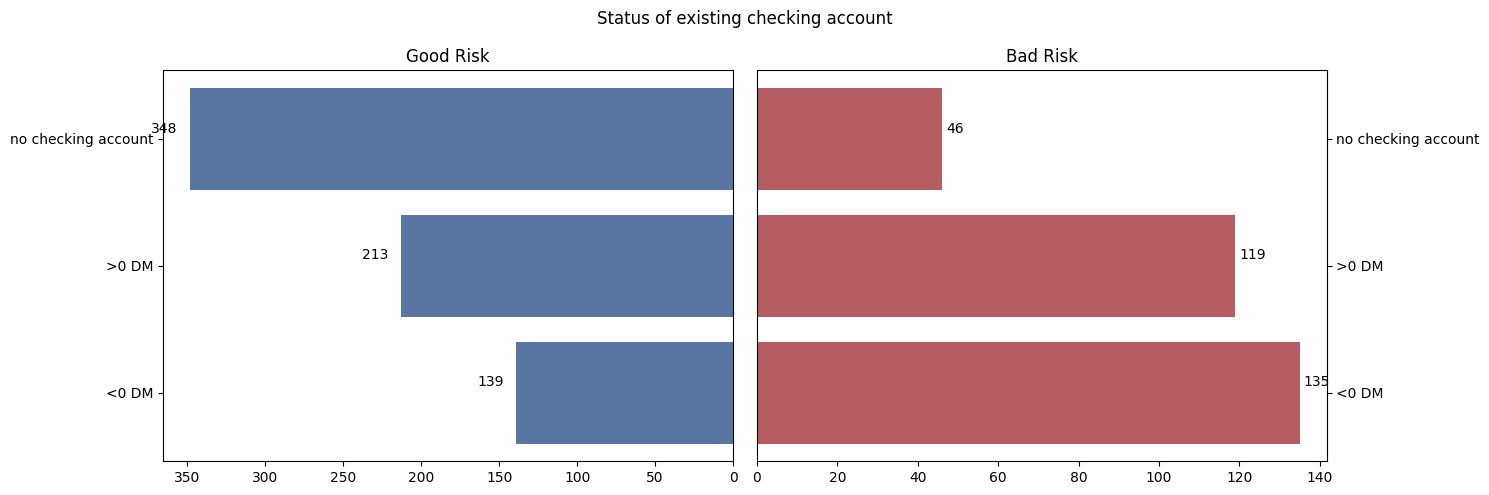

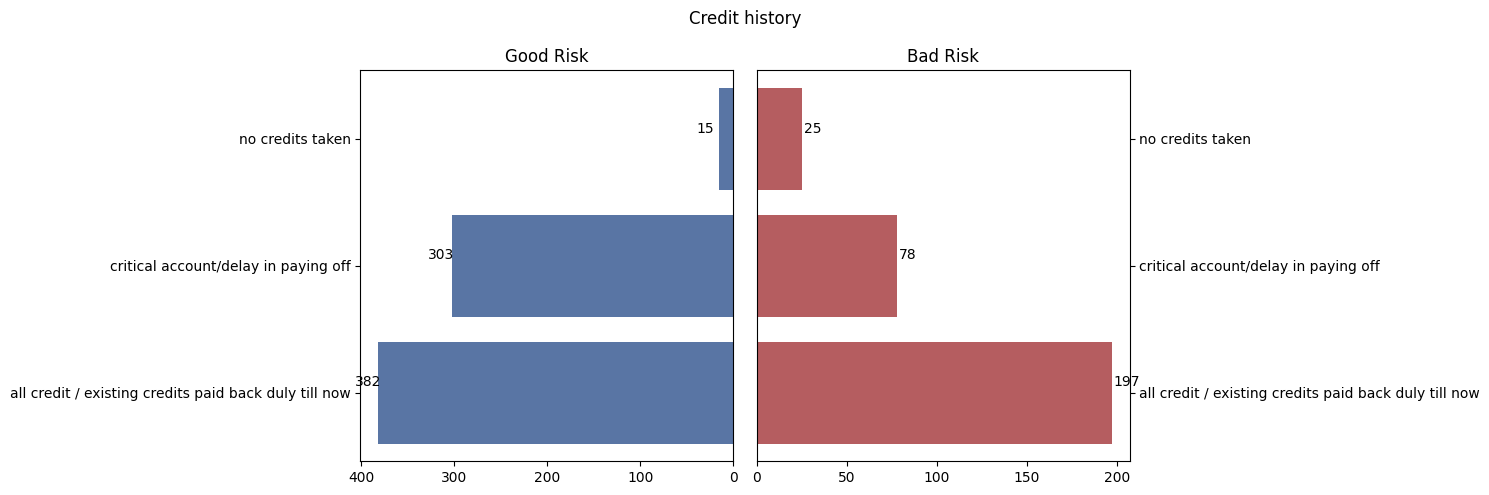

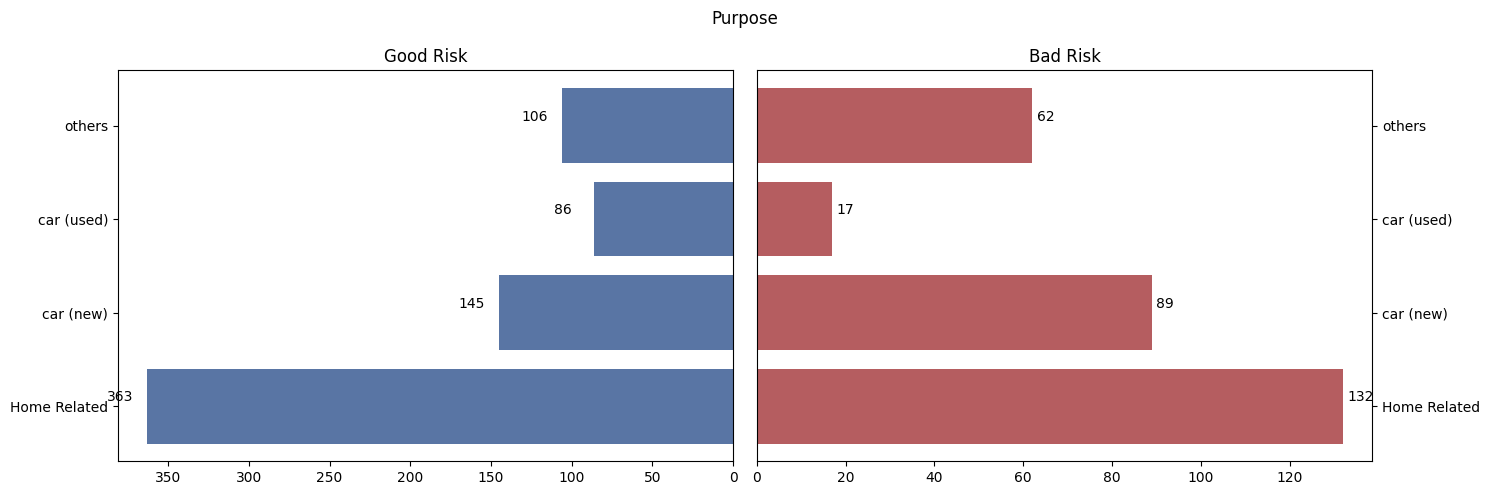

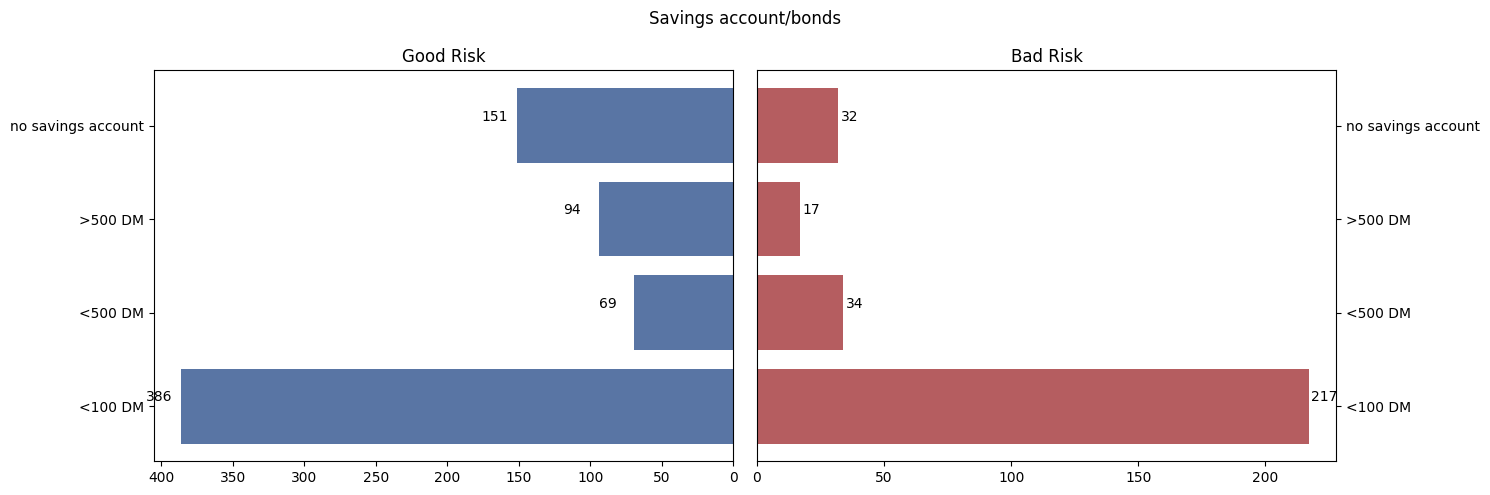

In [7]:

# Visualize key variables
key_variables = ["Status of existing checking account", "Credit history",
                "Purpose", "Savings account/bonds"]

for var in key_variables:
    visualize_distribution(var, df)


How to read a boxplot (each panel)

1. Box = interquartile range (IQR, 25th–75th percentile).

2. Line inside = median.

3. Whiskers = up to 1.5× IQR from the box.

4. Dots = outliers beyond the whiskers.

What your figure suggests

- Credit amount: Bad Risk has a higher median and wider spread with many high outliers → larger requested amounts skew risky.

- Age in years: Bad Risk looks slightly younger on median than Good Risk.

- Duration in month: Bad Risk has a longer median duration and heavier upper tail → longer terms trend riskier.

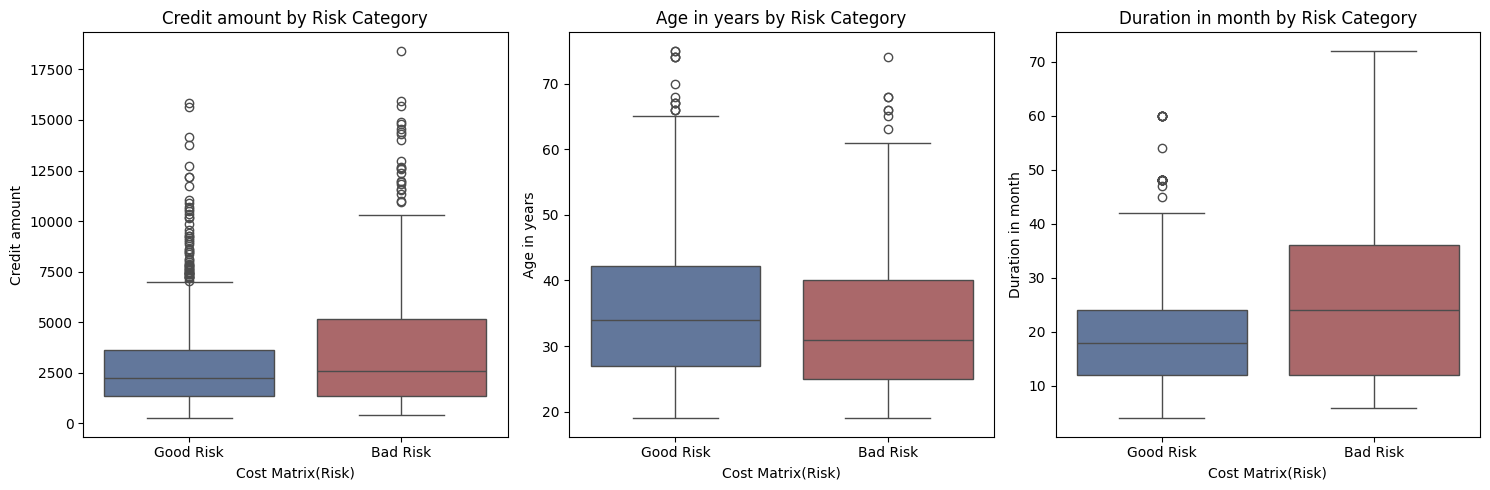

In [8]:

# Numerical variables by risk category
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], x=df["Cost Matrix(Risk)"],
                orient='v', ax=axes[i], palette=["#5975A4", "#B55D60"])
    axes[i].set_title(f'{col} by Risk Category')
plt.tight_layout()
plt.show()


## 6. Statistical Significance Testing

In [9]:

# Chi-square test for categorical variables
categorical_features = [col for col in df.columns if col not in numerical_cols + ['Cost Matrix(Risk)']]

statistical_significance = []
for attr in categorical_features:
    data_count = pd.crosstab(df[attr], df["Cost Matrix(Risk)"])
    obs = np.array(data_count[["Bad Risk", "Good Risk"]])
    chi2, p, dof, expected = stats.chi2_contingency(obs)
    statistical_significance.append([attr, round(p, 6)])

cat_stats_df = pd.DataFrame(statistical_significance, columns=["Attribute", "P-value"])
print("Categorical Variables Statistical Significance (Chi-square test):")
print(cat_stats_df.sort_values('P-value'))


Categorical Variables Statistical Significance (Chi-square test):
                                            Attribute   P-value
0                 Status of existing checking account  0.000000
1                                      Credit history  0.000000
3                               Savings account/bonds  0.000000
9                                            Property  0.000029
2                                             Purpose  0.000050
11                                            Housing  0.000112
4                            Present employment since  0.000422
10                            Other installment plans  0.000476
16                                     foreign worker  0.015831
6                             Personal status and sex  0.020740
5   Installment rate in percentage of disposable i...  0.140033
12            Number of existing credits at this bank  0.169304
15                                          Telephone  0.278876
13                                    

In [10]:

# ANOVA test for numerical variables
good_risk_df = df[df["Cost Matrix(Risk)"] == "Good Risk"]
bad_risk_df = df[df["Cost Matrix(Risk)"] == "Bad Risk"]

numerical_significance = []
for attr in numerical_cols:
    statistic, p = stats.f_oneway(good_risk_df[attr].values, bad_risk_df[attr].values)
    numerical_significance.append([attr, round(p, 6)])

num_stats_df = pd.DataFrame(numerical_significance, columns=["Attribute", "P-value"])
print("Numerical Variables Statistical Significance (ANOVA test):")
print(num_stats_df)


Numerical Variables Statistical Significance (ANOVA test):
           Attribute   P-value
0      Credit amount  0.000001
1       Age in years  0.003925
2  Duration in month  0.000000


## 7. Feature Engineering and Selection

In [11]:

# Select significant features (p < 0.05)
significant_categorical = cat_stats_df[cat_stats_df['P-value'] < 0.05]['Attribute'].tolist()
significant_numerical = num_stats_df[num_stats_df['P-value'] < 0.05]['Attribute'].tolist()

selected_features = significant_categorical + significant_numerical
print(f"Selected Features: {len(selected_features)}")
print(selected_features)

# Create final dataset
df_model = df[selected_features + ['Cost Matrix(Risk)']].copy()


Selected Features: 13
['Status of existing checking account', 'Credit history', 'Purpose', 'Savings account/bonds', 'Present employment since', 'Personal status and sex', 'Property', 'Other installment plans', 'Housing', 'foreign worker', 'Credit amount', 'Age in years', 'Duration in month']


In [12]:

# Create dummy variables for categorical features
categorical_features_final = [col for col in selected_features if col not in numerical_cols]

for attr in categorical_features_final:
    dummies = pd.get_dummies(df_model[attr], prefix=attr)
    df_model = pd.concat([df_model, dummies], axis=1)
    df_model.drop(attr, axis=1, inplace=True)

# Convert target variable to numeric
risk_mapping = {"Good Risk": 1, "Bad Risk": 0}
df_model["Cost Matrix(Risk)"] = df_model["Cost Matrix(Risk)"].map(risk_mapping)

print(f"Final dataset shape: {df_model.shape}")
print("\nFirst few columns:")
print(df_model.columns[:10].tolist())


Final dataset shape: (1000, 35)

First few columns:
['Credit amount', 'Age in years', 'Duration in month', 'Cost Matrix(Risk)', 'Status of existing checking account_<0 DM', 'Status of existing checking account_>0 DM', 'Status of existing checking account_no checking account', 'Credit history_all credit / existing credits paid back duly till now', 'Credit history_critical account/delay in paying off', 'Credit history_no credits taken']


## 8. Model Preparation

In [13]:

# Prepare features and target
X = df_model.drop('Cost Matrix(Risk)', axis=1).values
y = df_model['Cost Matrix(Risk)'].values

# Apply PCA for dimensionality reduction
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)

print(f"Original features: {X.shape[1]}")
print(f"PCA components: {X_pca.shape[1]}")
print(f"Explained variance ratio: {sum(pca.explained_variance_ratio_):.3f}")


Original features: 34
PCA components: 16
Explained variance ratio: 1.000


In [14]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.20, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Class distribution in training set:")
print(f"Good Risk (1): {sum(y_train)} ({sum(y_train)/len(y_train)*100:.1f}%)")
print(f"Bad Risk (0): {len(y_train)-sum(y_train)} ({(len(y_train)-sum(y_train))/len(y_train)*100:.1f}%)")


Training set: (800, 16)
Test set: (200, 16)
Class distribution in training set:
Good Risk (1): 560 (70.0%)
Bad Risk (0): 240 (30.0%)


## 9. Model Comparison

In [15]:

def evaluate_model(pipeline, X_train, y_train, X_test, y_test):
    """Evaluate model performance"""
    start_time = time()
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    training_time = time() - start_time

    f1 = f1_score(y_test, y_pred)

    print(f"F1 Score: {f1:.4f}")
    print(f"Training time: {training_time:.2f}s")
    print("-" * 50)

    return f1, training_time

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42)
}

# Compare models
results = []
print("Model Comparison Results:")
print("=" * 60)

for name, model in models.items():
    print(f"Evaluating {name}:")
    pipeline = Pipeline([('classifier', model)])
    f1, time_taken = evaluate_model(pipeline, X_train, y_train, X_test, y_test)
    results.append((name, f1, time_taken))

# Sort by F1 score
results.sort(key=lambda x: x[1], reverse=True)
print("\nRanked Results (by F1 Score):")
for rank, (name, f1, time_taken) in enumerate(results, 1):
    print(f"{rank}. {name}: F1={f1:.4f}, Time={time_taken:.2f}s")


Model Comparison Results:
Evaluating Logistic Regression:
F1 Score: 0.8211
Training time: 0.04s
--------------------------------------------------
Evaluating Random Forest:
F1 Score: 0.8106
Training time: 0.57s
--------------------------------------------------
Evaluating SVM:
F1 Score: 0.8303
Training time: 0.04s
--------------------------------------------------
Evaluating Gradient Boosting:
F1 Score: 0.8110
Training time: 0.87s
--------------------------------------------------
Evaluating XGBoost:
F1 Score: 0.8271
Training time: 0.27s
--------------------------------------------------
Evaluating LightGBM:
[LightGBM] [Info] Number of positive: 560, number of negative: 240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000349 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 16
[LightGBM] [Info] [binary:Boos

## 10. Hyperparameter Tuning (Best Model)

In [16]:

# Use the best performing model for hyperparameter tuning
best_model_name = results[0][0]
print(f"Hyperparameter tuning for: {best_model_name}")

# LightGBM hyperparameter tuning (assuming it's the best)
lgb_model = LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'feature_fraction': [0.6, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.8],
    'bagging_freq': [100, 200]
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    lgb_model,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)

print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")


Hyperparameter tuning for: SVM
Starting hyperparameter tuning...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Info] Number of positive: 560, number of negative: 240
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000157 seco

## 11. Final Model Evaluation

In [17]:

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
final_f1 = f1_score(y_test, y_pred)
final_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Final Model Performance:")
print(f"F1 Score: {final_f1:.4f}")
print(f"AUC Score: {final_auc:.4f}")

# Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Bad Risk', 'Good Risk']))


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
Final Model Performance:
F1 Score: 0.8405
AUC Score: 0.7871

Confusion Matrix:
[[ 11  49]
 [  3 137]]

Classification Report:
              precision    recall  f1-score   support

    Bad Risk       0.79      0.18      0.30        60
   Good Risk       0.74      0.98      0.84       140

    

## 12. ROC Curve Visualization

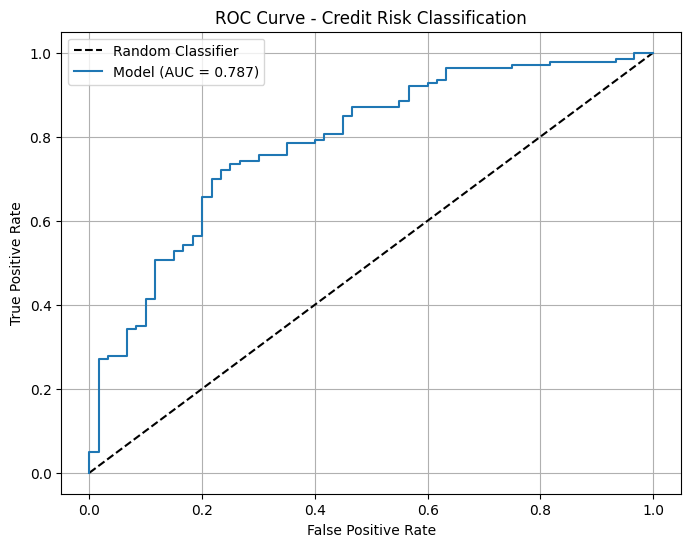

In [18]:

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.plot(fpr, tpr, label=f'Model (AUC = {final_auc:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Credit Risk Classification')
plt.legend()
plt.grid(True)
plt.show()


## 13. Feature Importance

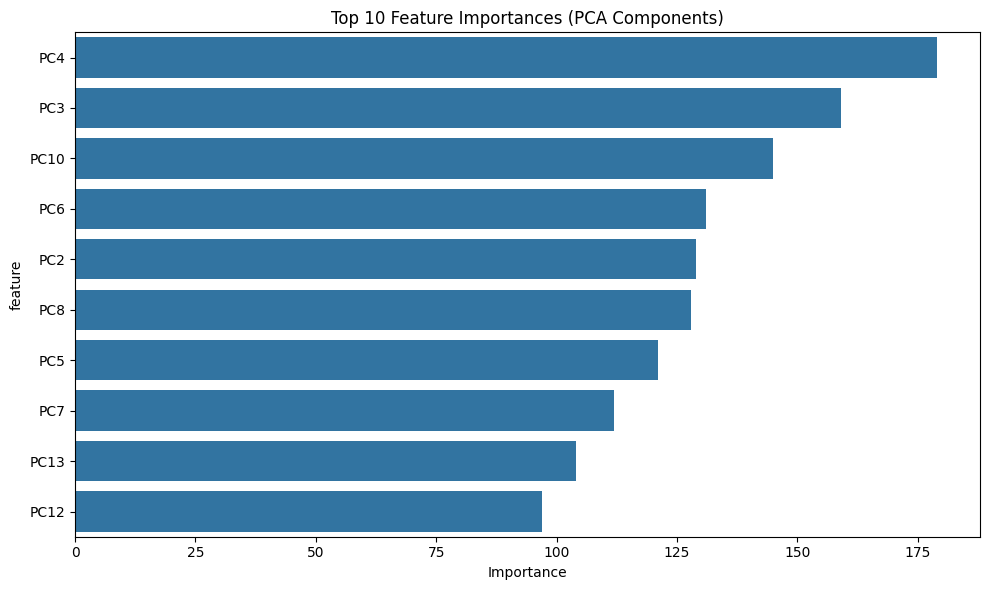

Top 10 Most Important Features:
   feature  importance
3      PC4         179
2      PC3         159
9     PC10         145
5      PC6         131
1      PC2         129
7      PC8         128
4      PC5         121
6      PC7         112
12    PC13         104
11    PC12          97


In [19]:

# Feature importance (if available)
if hasattr(best_model, 'feature_importances_'):
    feature_names = [f'PC{i+1}' for i in range(X_pca.shape[1])]
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
    plt.title('Top 10 Feature Importances (PCA Components)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    print("Top 10 Most Important Features:")
    print(feature_importance.head(10))



## Conclusion

This notebook demonstrates a complete credit risk analysis workflow:

1. **Data Loading & Preprocessing**: Cleaned and mapped categorical variables  
2. **Exploratory Data Analysis**: Visualized distributions and relationships  
3. **Statistical Testing**: Identified significant features using Chi-square and ANOVA tests  
4. **Feature Engineering**: Created dummy variables and applied PCA  
5. **Model Comparison**: Evaluated multiple machine learning algorithms  
6. **Hyperparameter Tuning**: Optimized the best performing model  
7. **Final Evaluation**: Assessed model performance with F1 score and AUC  

The final model can effectively classify credit risk with good performance metrics, helping financial institutions make informed lending decisions.
